In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.cluster import KMeans 

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
print('Libraries imported.')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Libraries imported.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Q1) K-Means Clustering

K-means clustering is a method which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In this question you will use K-Means clustering for 2 different examples
1. Implementing _k_-means clustering on a randomly generated dataset from scratch.
2. Implementing _k_-means using the SK-Learn library for cluster segmentation and profile building.

### 1. *k*-means on a Randomly Generated Dataset
30 data points belonging to 2 different clusters have been assigned  
x1 is the first feature and x2 the second

In [0]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

In [0]:
centers = [[-2, 2], [2, -2]]
colors_map = np.array(['b', 'r'])

#### Define a function that assigns each datapoint to a cluster
In this first part of Q1 you will have to implement K-Means Clustering from scratch. As you have studied in class that centers are first chosen at random, however here we have initialized the centers for you as `[[-2,-2],[-2,-2]]` for ease in checking which also means we have already chosen the number of clusters to equal 2.

In the first function `assign_members` you will take both features along with the centers as parameters and will assign the colours and class of points to both clusters according to their centers. You will then return colours and class of points to feed into the next function.

Hint: Think of class of points as a boolean array for each cluster

In [0]:
def assign_members(x1, x2, centers):
  cluster_distances = np.zeros((len(x1),4))
  cluster_assignment = np.zeros((len(x1)))
  color_assignment = []
  for i in range(len(x1)):
    # Compute euclidean distance for both clusters for both dimensions
    one_1 = np.square(x1[i] - centers[0][0]) 
    one_2 = np.square(x2[i] - centers[0][1])
    two_1 = np.square(x1[i] - centers[1][0]) 
    two_2 = np.square(x2[i] - centers[1][1])
    cluster_distances[i] = [one_1,one_2,two_1,two_2]

  # Cluster assignment

  euclidean_dist = np.zeros((len(x1),2))

  euclidean_dist[:,0] = np.power(np.sum(cluster_distances[:,0:2],axis=1),0.5)
  euclidean_dist[:,1] = np.power(np.sum(cluster_distances[:,2:],axis=1),0.5)


  for i in range(len(x1)):
    clust_ind = np.argmin(euclidean_dist[i])
    cluster_assignment[i] = clust_ind
    if clust_ind == 0:
      color  = colors_map[0]
    elif clust_ind == 1:
      color  = colors_map[1]
    color_assignment.append(color)

  return cluster_distances,cluster_assignment.astype(np.int),np.array(color_assignment),euclidean_dist

#### Define a function that updates the centroid of each cluster

In the `update_centers` function you will take along with both features the class of points as parameter and returns the updated centers

In [0]:
def update_centers(x1, x2, class_of_points):
  cen_1_1,cen_1_2,cen_2_1,cen_2_2 = 0,0,0,0
  count_1,count_2 = 0,0;

  count_1 = np.count_nonzero(class_of_points == 1)
  count_2 = len(class_of_points) - count_1

  for i in range(class_of_points.shape[0]):
    if(class_of_points[i] == 0):
      cen_1_1 += x1[i]
      cen_1_2 += x2[i]
    else:
      cen_2_1 += x1[i]
      cen_2_2 += x2[i]

  cen_1_1,cen_1_2,cen_2_1,cen_2_2 = (cen_1_1/count_1),(cen_1_2/count_1),(cen_2_1/count_2),(cen_2_2/count_2)
  centers = [[cen_1_1,cen_1_2],[cen_2_1,cen_2_2]]
  return centers  

In [0]:
#cents = update_centers(x1,x2,class_of_points)
#cents

You dont have to implement the `plot_points` function as it has already been implemented for you. All you have to know is it takes centers and an array of colours and a figure title as its parameters. However if you wish to change it then you may do so.

In [0]:
# Dont change this function
def plot_points(centroids=None, colors='g', figure_title=None):
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors[class_of_points])
    
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    ax.set_title(figure_title, fontsize=24)

    plt.show()

#### Initialize data points and centers and plot

In [0]:
dimension_dist,class_of_points,color_assignments,euclidean_dist = assign_members(x1,x2,centers)



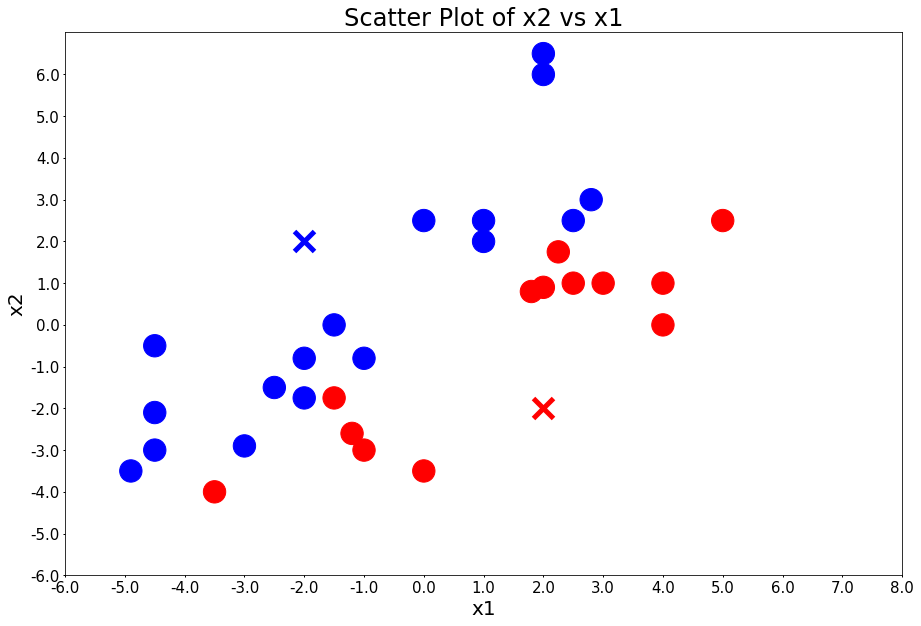

In [0]:
plot_points(centroids = centers,figure_title='Scatter Plot of x2 vs x1',colors = colors_map)

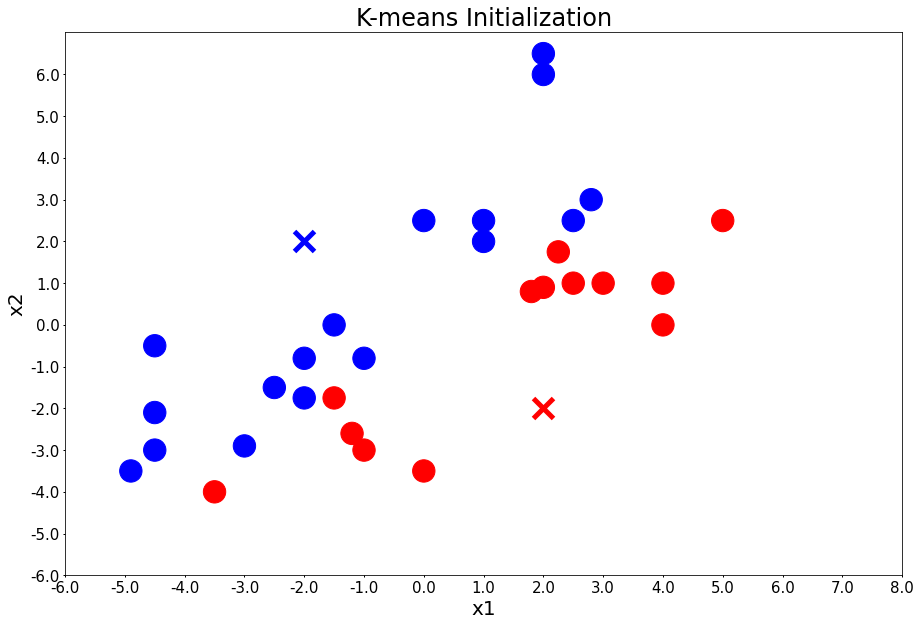

In [0]:
plot_points(centers, figure_title='K-means Initialization',colors = colors_map)

#### Run the iterations 4 times and plot each cluster assignment and plot each center update
Now use the functions that you have implemented and fill out the for loop  
You have to plot two scatter plot for each iteration, one after the cluster assignment and the second after updating the centers   
The last two plots should look like this after running it for 4 iterations after which it converges 

![Cluster Assignment](ClusterAssignment.PNG)
![Centroid Update](CenterUpdate.PNG)


Iteration :  1
After cluster assignment


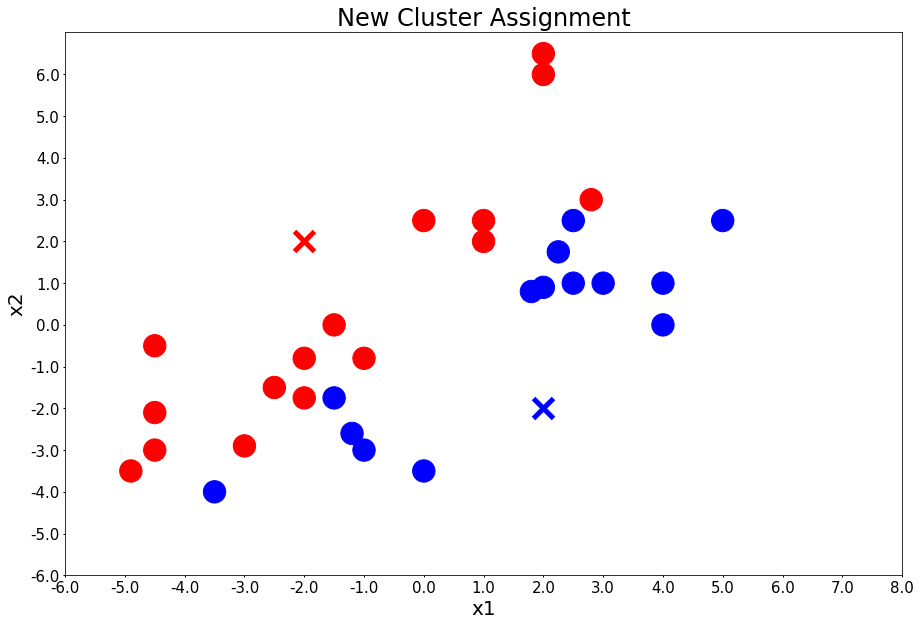

After updating the centers


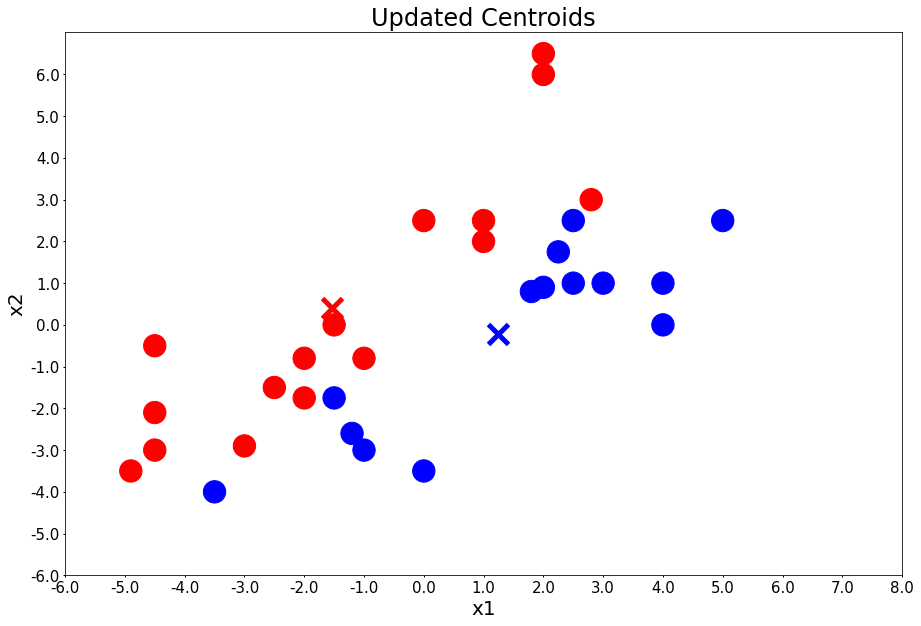

Iteration :  2
After cluster assignment


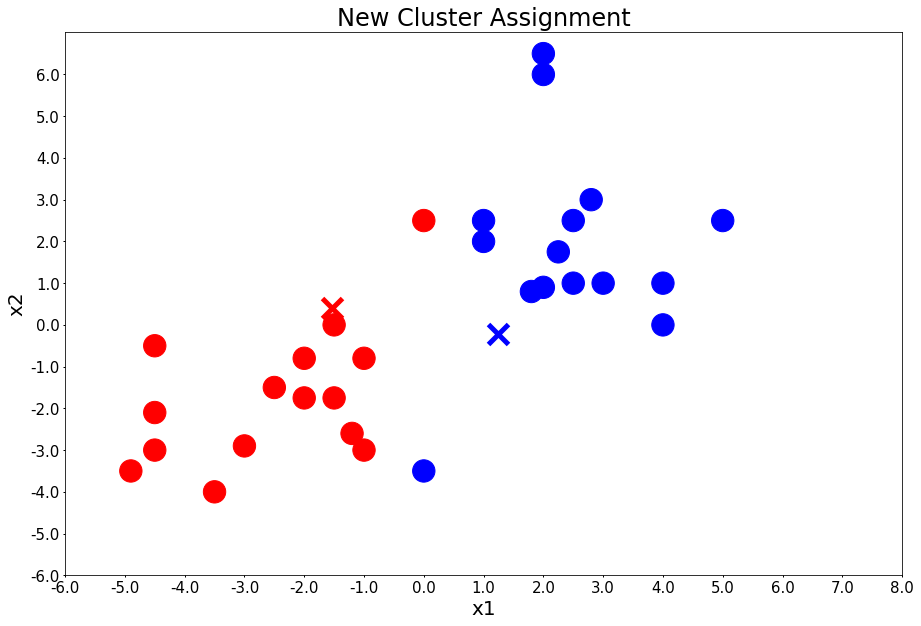

After updating the centers


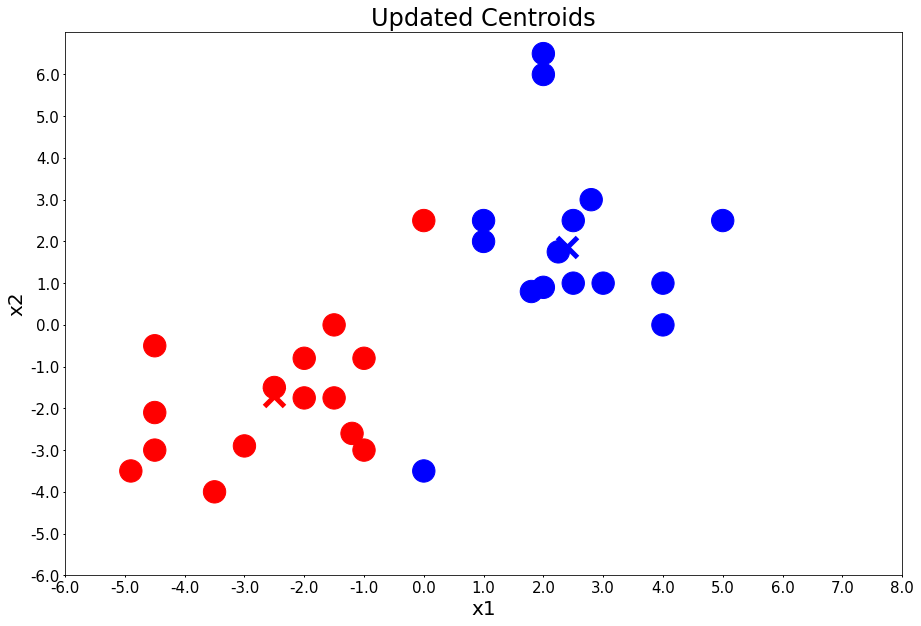

Iteration :  3
After cluster assignment


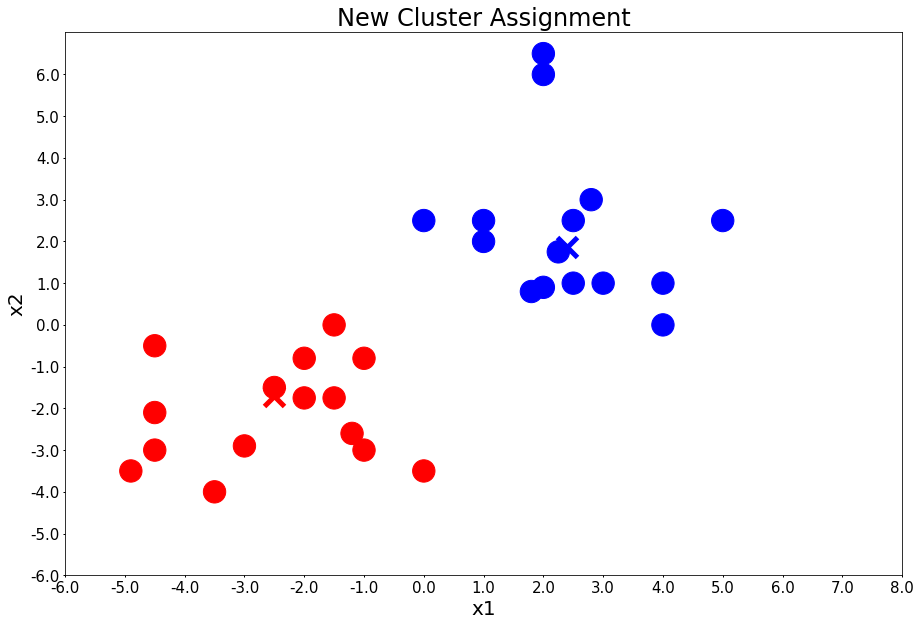

After updating the centers


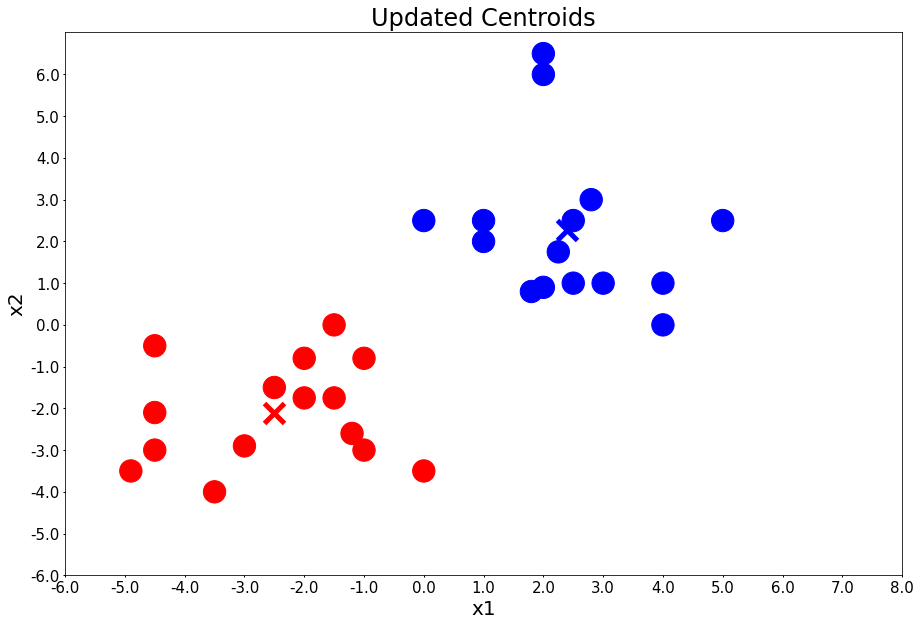

Iteration :  4
After cluster assignment


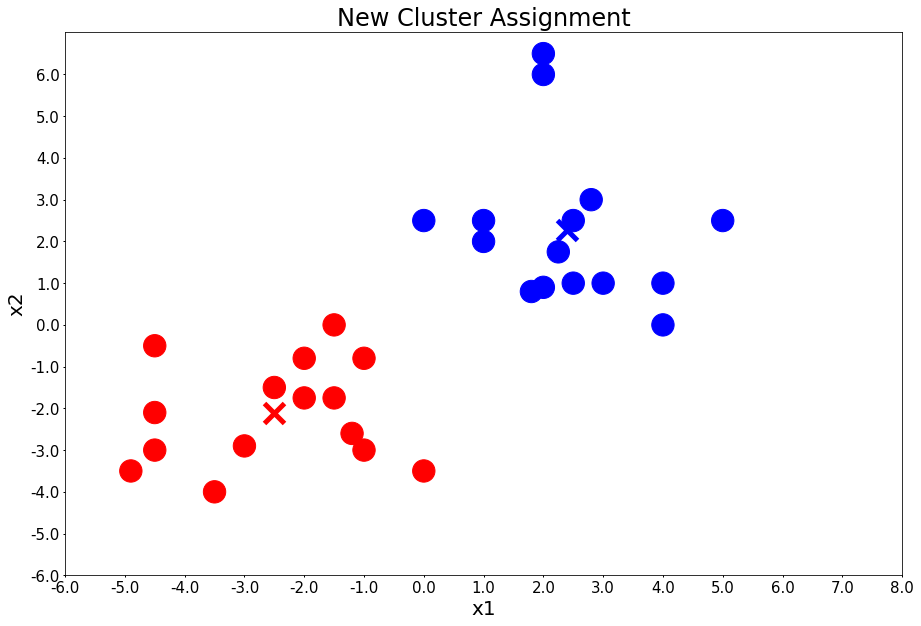

After updating the centers


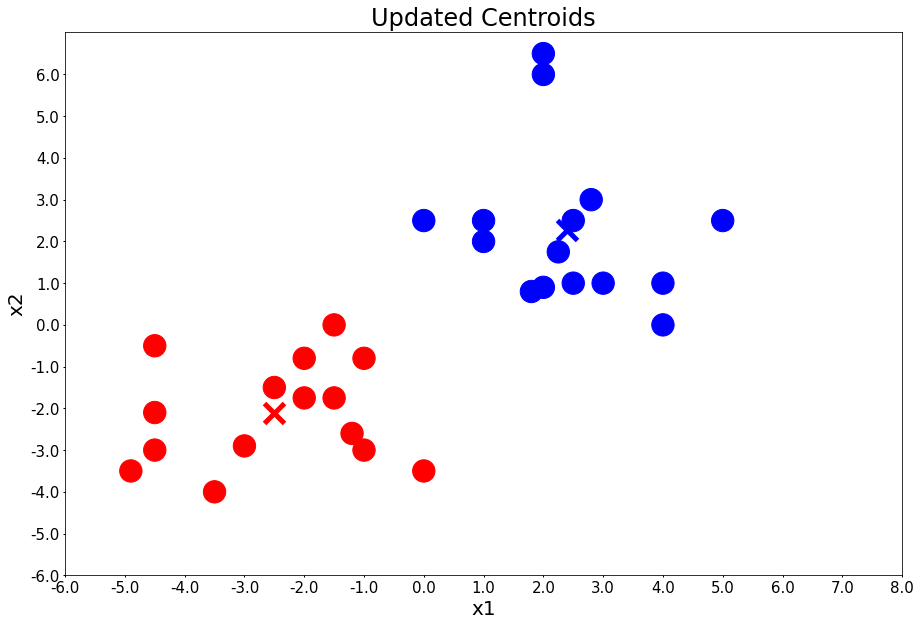

In [0]:
centers = [[2, -2], [-2, 2]]
number_of_iterations = 4
for i in range(0,number_of_iterations):
    # Your code goes here
    print('Iteration : ', i + 1)
    print("After cluster assignment")
    dimension_dist,class_of_points,color_assignments,euclidean_dist = assign_members(x1,x2,centers)

    plot_points(centers, figure_title='New Cluster Assignment',colors = colors_map)
    print("After updating the centers") 
    centers = update_centers(x1,x2,class_of_points)
    plot_points(centers, figure_title='Updated Centroids',colors = colors_map)
  

### 2. *k*-means for Cluster Segmentation and Profile Building

**Step 1)** Read the customer_segemntation csv file into a dataframe and display the first 5 rows

In [0]:
# Your code goes here
cu_seg = '/content/drive/My Drive/customer_segmentation.csv'

cust_segmentation = pd.read_csv(cu_seg)
cust_segmentation.head(5)


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


**Step 2)** Drop any columns which will not be of any use (if any) and display the first 5 rows

In [0]:
# Drop address since not numeric so distances can't be computed

cust_segmentation = cust_segmentation.drop("Address",axis=1)

cust_segmentation = cust_segmentation.drop("Customer Id",axis=1)
cust_segmentation.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


**Question:** Explain why you dropped those columns (if any)?

**Answer:** Address was dropped because we are trying to do clustering and Address was not a numeric attribute. We can't compute distances such as Euclidean distance for non-numeric attribues.

Also, Customer ID was dropped because well, it doesn't provide any information and we had to make the code compatible for a later function

**Step 3)** Check to see if there any NaN entries. Show the count of Nan entries for each column

In [0]:
cust_segmentation.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [0]:
# 150 missing values in the column Defaulted

**Step 4)** You can either drop these Nan entries or fill in the missing values. Show the first 5 rows and the count of Nan entries for each column after you have either dropped or filled the missing values

In [0]:
# Filling missing values
cust_segmentation["Defaulted"].fillna(cust_segmentation["Defaulted"].mode()[0], inplace=True)

In [0]:
# Confirming if values have been entered
cust_segmentation.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [0]:
cust_segmentation.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


**Question:** Which method did you use to finish the NaN entries? And why is that method better than the other for K-Means clustering?

**Answer:** I used the mode of the column to fill in the missing values. This was done because Defaulted was a binary variable indicating whether the person had defaulted or not. If I had chosen the mean as the value to fill in, it would have been meaningless since it would have been in the range of 0-1 and it wouldn't make sense because of the binary nature of the variable.

Also, this is a cateogorical variable and therefore, K means should not exactly be run on it given categorical variables do not have a distance metric interpretation

**Step 5)** Normalize your data and convert it into a numpy array. Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally    
Hint: To Normalize checkout SKLearn library for any inbuilt function

In [0]:
# Your code goes here
# Simple mean subtraction and division by the std dev will do
X = np.array(cust_segmentation)
X_N = np.array(X- np.mean(X,axis= 0)) / np.std(X,axis=0)


**Step 6)** Here you will now use SK Learn's library for K-Means. 
You will use 3 clusters here.
Initailize the `n_init` parameter to equal 12

In [0]:
# Your code goes here

# Initialize
no_clusters = 3

k_means = KMeans(n_clusters=no_clusters, init='random',
                n_init=12)
# Fit
k_means.fit(X_N)

# Print labels

labels = k_means.labels_
print("The labels are: ", labels)

The labels are:  [2 1 0 2 1 1 2 2 2 1 0 2 2 2 0 2 2 2 1 2 2 2 0 1 1 2 2 2 2 2 2 1 0 2 2 2 0
 0 2 1 0 1 2 1 2 1 2 2 2 2 1 1 0 2 0 0 0 2 2 2 1 2 1 1 2 2 2 0 2 0 2 2 2 2
 2 2 2 2 1 2 2 0 1 2 1 2 2 2 0 0 2 2 0 0 2 2 2 2 0 2 0 1 2 0 0 1 2 2 2 2 2
 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 1 2 2 0
 2 2 2 1 0 2 2 2 2 1 0 0 2 1 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 2 0 1 0 2 2 1 0
 1 2 2 2 2 2 1 2 0 2 2 2 1 1 2 1 2 0 2 2 0 2 1 2 0 2 2 2 2 2 0 0 1 2 2 0 1
 2 2 2 2 1 2 2 0 2 2 2 2 1 2 2 0 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 1 0 2 0 2
 2 2 1 2 0 1 0 2 1 2 2 0 2 2 2 2 0 0 0 2 2 2 1 2 2 1 2 1 2 2 1 2 2 2 0 2 2
 0 2 0 1 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 0 2 0 1 2 0 2 2 2 0 0 2 2 2 1 0
 2 2 0 2 1 2 2 2 2 2 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 0 2 0 2 2 2 1 1 2
 0 2 1 0 0 2 2 2 0 2 2 2 2 2 1 2 1 2 2 2 2 0 2 0 2 2 2 1 2 2 2 2 0 2 2 0 0
 1 2 2 2 2 2 0 0 2 1 0 1 2 2 0 2 2 1 1 2 0 2 2 1 2 0 2 1 2 2 2 1 2 2 2 2 1
 2 0 2 2 2 2 1 0 2 2 1 2 0 2 2 1 2 1 2 2 2 2 2 2 2 1 1 2 2 1 2 0 2 2 2 0 2
 0 2 2 2

**Question:** Here you have been provided with the number of clusters from before. Give two methods where you can find out the optimal number of clusters?  
**Answer:**  
1. One method is Elbow Method which is computed by first finding total within-cluster sum of square (wss) for different values of k and plotting these for the respective values of K after which the curves are inspected. Where there is a bend, that is the optimal number of clusters to consider.

2. Another one is the Average Silhouette method which computes clustering quality by determining how well each object lies within its cluster.  Just like the elbow method, clustering is done for different values of K and for each value of K, the avergae Silhotte is computed followed by their curves. The peak is considered the optimum number of clusters that should be constructed

**Step 7)** Add a column to your original dataframe with these labels and name the column `Labels`

In [0]:
# Your code goes here
cust_segmentation['Labels'] = labels

cust_segmentation.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,41,2,6,19,0.124,1.073,0.0,6.3,2
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,2
4,47,1,31,253,9.308,8.908,0.0,7.2,1


**Step 8)** Visualize your clusters. X is the normalized numpy array. You dont need to implement this, it has already been done for you. The following image shows what the result should more or less look like.
![Visual](Clusters.PNG)

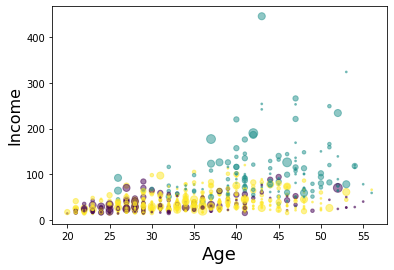

In [0]:
area = np.pi * ( X[:, 1])**2  
#plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

**Step 9)** Here you will do profile building

K-means will partition your customers into three groups since we specified the algorithm to generate 3 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 

Compare all 3 clusters and give main characterstics for each profile/cluster.  
For E.g The group which is older in `age` have a higher `income`

Hint: Use groupby

In [0]:
# Your code goes here
cust_segmentation.groupby('Labels').mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,
0,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
1,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


Characteristics for each cluster  
1. Adults in their early thirties, the youngest in our set, who are fairly well educated and have been employeed for an average of 3.96 years. They have the lowest income of all and have some card debt as well as other debt. They also have very high default rates and have accumulated high amounts of debt. 
2. This group consists of people in their early forties, the oldest in our data set, who are the most educated among the people in the dataset and have been employeed for almost 17 years with quite high income levels. They also have significant Card and Other debt but have low default rates. Also, they are quite heavily indebted. 

3. This group consists of people in their early to mid-thrities and have low education.Being middle aged, they've been employed for a mean of 7.6 years and despite being employed for that long, their incomes aren't much higher than people in group 1 who've been employed for fewer years. None of these people have defauted on their debts and they have less card and other debts. Their debt to income ratio is quite low.

**Question:** Give 2 advantages and 2 disavantages of using K Means Clustering over say a Hierarchal Clustering Method such a Agglomerative Clustering or a Density Based Clustering Method such as DB-Scan?

**Advantages**
1. KMeans is much faster than DBScan
2. Kmeans is relatively simple to implement

**Disadvantages**
1 - K means requires the number of clusters to be made to be a hyper parameter whereas DBSAN can looks at the data to construct the number of clusters

2. K means clustering is sensitive to outliers because it uses distance measures i.e euclidean distance so outliers can distort the data

## Q2) Hierarchical  Clustering
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering algorithms:

*   Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
*   Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

In this question, you will be performing Agglomerative Clustering on a customers shopping habits dataset and then labelling the clusters.

**Question** Load the dataset and look for possible missing values. Handle them appropriately. (If any) 

In [0]:
### Code here

# Your code goes here
cu_shop = '/content/drive/My Drive/customers_shopping.csv'
cust_shopping = pd.read_csv(cu_shop)
cust_shopping.head(5)




,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
cust_shopping.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [0]:
# No missing values 

**Dendrogram** is used to visualize the history of groupings and figure out the optimal number of clusters.

**Question:** Draw **two dendograms using two different linkage methods**. *Comment on the cause of differences between the two*.

Pick **one** of the above which you find to be the best. Mention the **number of clusters** and justify your answer.

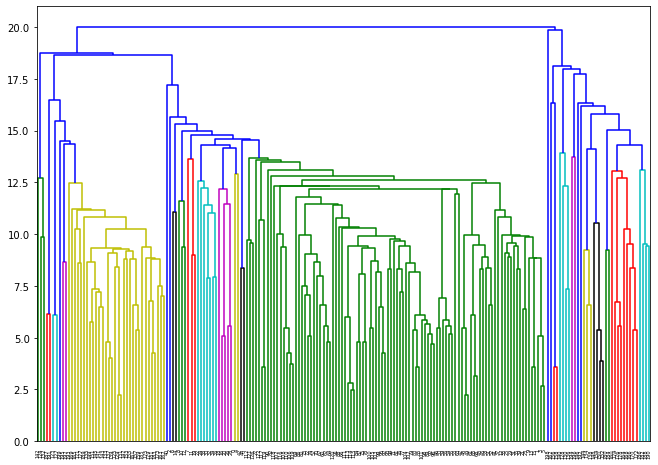

In [0]:
#### Draw dendrogram here

# Using the Single Linkage method


plt.figure(figsize=(11, 8))
single_link = sch.linkage(cust_shopping.replace({'Genre':{"Male":1, "Female":0}}),method='single')
dendo_single = sch.dendrogram(single_link)

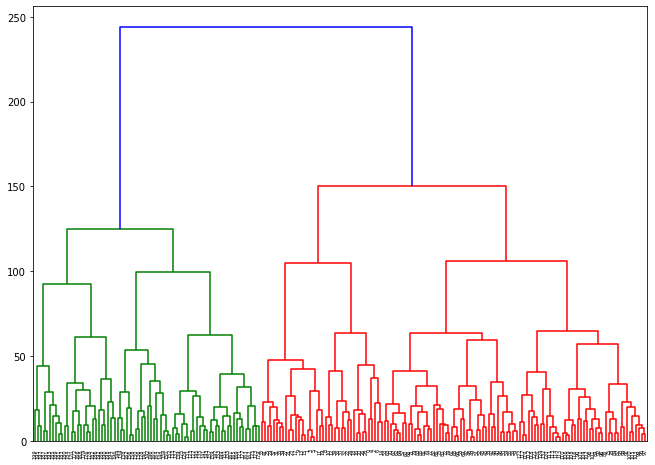

In [0]:
#### Draw dendrogram here

# Using Complete Link Clustering
plt.figure(figsize=(11, 8))

comp_link = sch.linkage(cust_shopping.replace({'Genre':{"Male":1, "Female":0}}), method='complete')
comp_dendro = sch.dendrogram(comp_link)

### Cause of Differences:

The reason for this difference is that while doing hierachical clustering, the single link method is selecting the next cluster to merge with on the basis of the minimum distance between two points in two clusters.

Complete link on the other hand, selects the clusters to merge with on the basis of the maximum distance between two points in two clusters. 

Therefore, different clusters are chosen to be merged together by different algorithms.

### Optimal Number of Clusters: 5


### Justification: 
Whilst there are no hard and fast rules to determine the optimal number of clusters for hierarchical clustering, there are heuristical methods to choose the optimal number of clusters such as drawing a vertical line such that we cover the maximum vertical distance without any horizontal line intersecting it and counting the number of clusters on the level of that line. 

However, from observation, we can see that any less than five clusters would result in our clusters containing very hetrogenous data. Therefore, 5 seems to be optimal

**Question:** Create an agglomerative cluster using your optimal number of clusters and plot a scatter diagram

In [0]:
cust_shopping.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
### write your code here
agg_cluster = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage='complete')
cluster_assignments = agg_cluster.fit_predict( (cust_shopping.replace({'Genre':{"Male":1, "Female":0}})).drop(columns=["CustomerID"]) )  

Text(0.5, 1.0, 'Annual Income (k$) & Spending Score ')

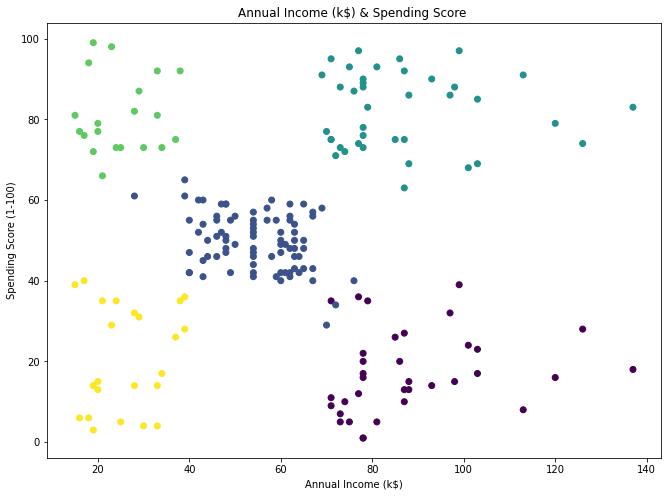

In [0]:
# Scatter Plot

plt.figure(figsize=(11, 8))
plt.scatter(cust_shopping.iloc[:,3], cust_shopping.iloc[:,4], c=agg_cluster.labels_,)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) & Spending Score ")

**Question:** What do each of the clusters represent?

**Answer:**  Each cluster represents our algorithms way of separating customers into different segments based on their income level and their spending scores. Basically, we've been able to group people on the basis of similar features where each group is represented by a cluster.

Green Cluster - People in this cluster have low uncome but their spending scores are high i.e they are spendthrifters in the sense that they must have low savings as well given their high spending
Yello Cluster - People in this cluster have, on average, the same income as the people in the green cluster but they have a lower spending score i.e they spend their incomes wisely knowing that that they earn less

Blue Cluster(Middle) - People in this cluster have middle incomes levels and don't have very high or very low spending scores i.e they spend according their incomes quite sensibly as well.

Purple Cluster(Bottom Right) - People in this cluster have high incomes but spend very less i.e they save a lot and might even be considered misers by some. Anyway, they must have high savings/investments ratio so we can consider them savers

Blue-Green(Top right) - People in this cluster have high incomes and they spend a lot as well as indicated by their spending scores. They have high purchasing powers and do like to excersie it. From a marketing point of view, these are pretty good target customers if you are selling luxury items

